In [1]:
%matplotlib inline
import math 
import src.Units.modelCloud as modelc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/Users/s20/ECAI/.venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
n_agents = 100
m = math.ceil(n_agents/10) #when less, less dense network
miu = 0.5 #Central nodes don't change
totallearn = 10 #refers to the number of iterations specified in paper too
totalrounds = 0 #keep it 0
maxJobSize = 10
baseline = 1 #0, 1, -1 (0=no rl but random, -1: no rl and static,1 =rl)
n_thoryvos = n_agents#math.ceil(n_agents/2)
update = 'com' # 'ind', 'com', 'exp','ran'
reward = 'com'# 'ind', 'com', 'exp'
m_t = math.sqrt(n_agents) #number of jobs accepted 
env = modelc.Environment(n_agents,n_thoryvos,m,miu,totalrounds,m_t,maxJobSize,totallearn,baseline,update,reward) #calls __init__ of SoSPole class
reps = 10
for j in range(reps):
  env = modelc.Environment(n_agents,n_thoryvos,m,miu,totalrounds,m_t,maxJobSize,totallearn,baseline,update,reward) #calls step of SoSPole class
  for i in range(1):
    env.step()
    dc = env.datacollector6.get_model_vars_dataframe()
    dca = env.datacollector2.get_agent_vars_dataframe()
  name = 'csv/' + str(totallearn) + '_' + str(totalrounds) + '_' + str(baseline) + '_'+ str(update) +'_'+ str(reward) + '_' +str(j) +'.csv'
  name2 = 'csv/A' + str(totallearn) + '_' + str(totalrounds) + '_' + str(baseline) + '_'+ str(update) +'_'+ str(reward) + '_' +str(j) +'.csv'
  dc.to_csv(name)
  dca.to_csv(name2)

/Users/s20/ECAI/.venv/lib/python3.9/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float16
  logger.warn(
/Users/s20/ECAI/.venv/lib/python3.9/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float16
  logger.warn(
/Users/s20/ECAI/.venv/lib/python3.9/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float16
  logger.warn(
/Users/s20/ECAI/.venv/lib/python3.9/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float16
  logger.warn(
/Users/s20/ECAI/.venv/lib/python3.9/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float16
  logger.warn(
/Users/s20/ECAI/.venv/lib/python3.9/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float16
  logger.warn(
/Users/s20/ECAI/.venv/lib/python3.9/site-packages/gym/spaces/box

In [3]:
import math 
from pandas import read_csv
c = 100

name = 'csv/' + str(totallearn) + '_' + str(totalrounds) + '_' + str(baseline) + '_'+ str(update) +'_'+ str(reward) +'_'+ '0' +'.csv'
name2 = 'csv/A' + str(totallearn) + '_' + str(totalrounds) + '_' + str(baseline) + '_'+ str(update) +'_'+ str(reward) +'_'+ '0' +'.csv'
dci =read_csv(name)
dca =read_csv(name2)
x = dci['rounds']
y = dci['NagentsIn']
z = dci['thoryvos']
xsel = dci['rounds'][::c]
ysel = dci['Esel'][::c]
std = dci['stdsel'][::c]
yb = dci['Ebi'][::c]
stdb = dci['stdbi'][::c]
ye = dci['Eei'][::c]
stde = dci['stdei'][::c]
yi = dci['Eii'][::c]
stdi = dci['stdii'][::c]
yf = dci['Efi'][::c]
stdf = dci['stdfi'][::c]
y0 = dci['aIV']
y1 = dci['aEV']
y2 = dci['aFN']
y3 = dci['aBN']
xa = dca['Step']
ya = dca['AgentID']
za = dca['Voice']


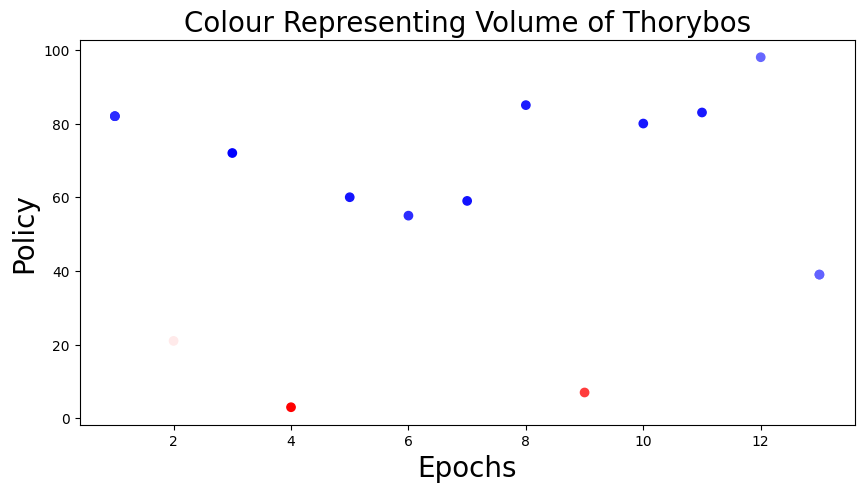

In [4]:
from pandas import read_csv

plt.figure(figsize=(10,5)) 
plt.scatter(x, y, c=z,cmap='bwr', label = 'Policy',linewidth=1)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Policy',fontsize=20)
plt.title('Colour Representing Volume of Thorybos',fontsize=20)
# plt.legend(loc=1, prop={'size': 10})
plt.savefig("Figures/2DTP_com_com.jpg")
plt.show()

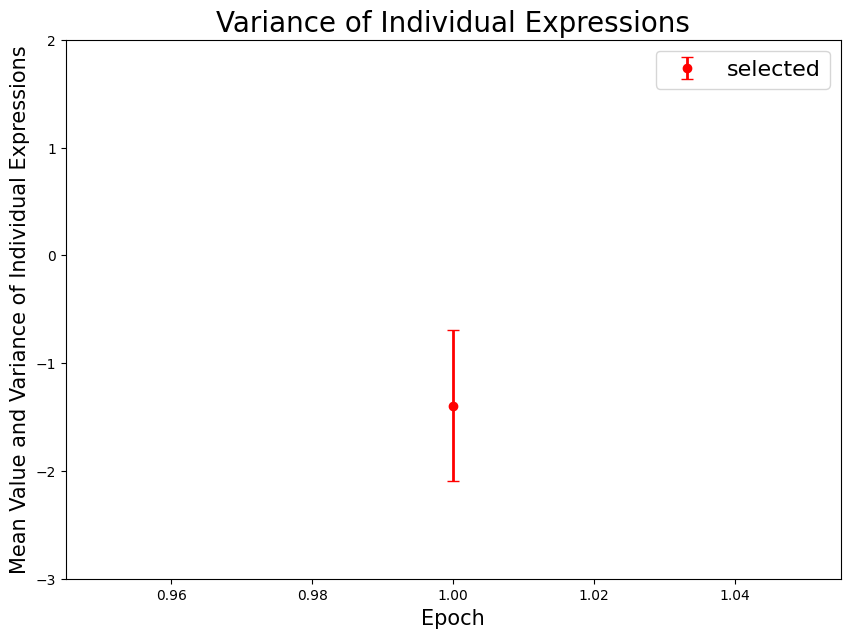

In [5]:
plt.figure(figsize=(10,7))
plt.errorbar(xsel, ysel, std, color ='r',label = 'selected', fmt='o', linewidth=2, capsize=4)
# plt.errorbar(x, yb, stdb, color = 'g', label = 'background',fmt='o', linewidth=0.5, capsize=2)
# plt.errorbar(x, yf, stdf, color = 'c', label = 'foreground', fmt='o', linewidth=0.5, capsize=2)
# plt.errorbar(x, yi, stdi, color ='b', label = 'inner voice', fmt='o', linewidth=0.5, capsize=2)
# plt.errorbar(x, ye, stde, color = 'y', label = 'experts', fmt='o', linewidth=0.5, capsize=2)
plt.legend(loc=1, prop={'size': 16})
plt.xlabel('Epoch',fontsize=15)
plt.ylim(-3,2)
plt.ylabel('Mean Value and Variance of Individual Expressions',fontsize=15)
plt.title('Variance of Individual Expressions',fontsize=20)
plt.savefig("Figures/Vindexp_com_com.jpg")
plt.show()

In [6]:

for j in range(reps-1):  
  name = 'csv/' + str(totallearn) + '_' + str(totalrounds) + '_' + str(baseline) + '_'+ str(update) +'_'+ str(reward) +'_'+ str(j+1) +'.csv'
  name2 = 'csv/A' + str(totallearn) + '_' + str(totalrounds) + '_' + str(baseline) + '_'+ str(update) +'_'+ str(reward) +'_'+ str(j+1) +'.csv' 
  dci =read_csv(name)
  dca =read_csv(name2)
  x = dci['rounds'] 
  y = dci['NagentsIn'] + y
  z = dci['thoryvos'] + z
  # xsel = dci['rounds'][::c] + xsel
  ysel = dci['Esel'][::c] + ysel
  std = dci['stdsel'][::c] + std
  yb = dci['Ebi'][::c] + yb
  stdb = dci['stdbi'][::c] + stdb
  ye = dci['Eei'][::c] + ye
  stde = dci['stdei'][::c] + stde
  yi = dci['Eii'][::c] + yi
  stdi = dci['stdii'][::c] + stdi
  yf = dci['Efi'][::c] + yf
  stdf = dci['stdfi'][::c] + stdf
  y0 = dci['aIV'] + y0
  y1 = dci['aEV'] + y1
  y2 = dci['aFN'] + y2
  y3 = dci['aBN'] + y3
  xa = dca['Step'] + xa
  ya = dca['AgentID'] + ya
  za = dca['Voice'] + za
x= dci['rounds']
y0 = y0/reps
y1 = y1/reps
y2 = y2/reps
y3 = y3/reps
y = y/reps
z = z/reps
# xesl = xsel/reps
yesl = ysel/reps
std = std/reps
yb = yb/reps
stdb = stdb/reps
ye = ye/reps
stde = stde/reps
yi = yi/reps
stdi = stdi/reps
yf = yf/reps
stdf = stdf/reps
xa = xa/reps
ya = ya/reps
za = za/reps

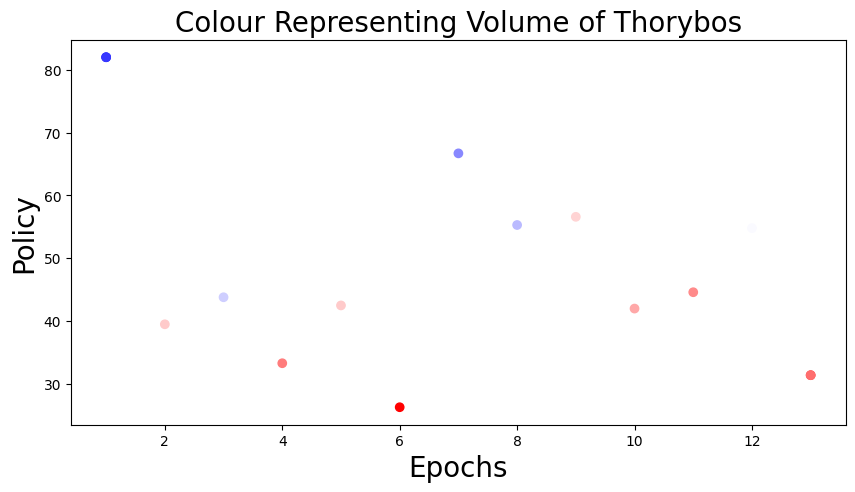

In [7]:
from pandas import read_csv

plt.figure(figsize=(10,5)) 
plt.scatter(x, y, c=z,cmap='bwr', label = 'Policy',linewidth=1)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Policy',fontsize=20)
plt.title('Colour Representing Volume of Thorybos',fontsize=20)
# plt.legend(loc=1, prop={'size': 10})
plt.savefig("Figures/AVG/2DTP_com_com.jpg")
plt.show()

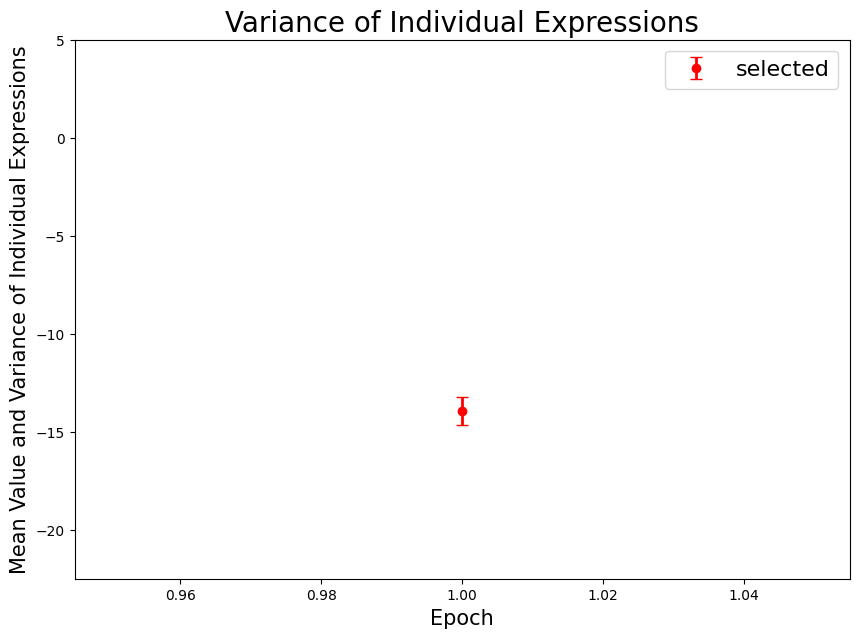

In [8]:
plt.figure(figsize=(10,7))
plt.errorbar(xsel, ysel, std, color ='r',label = 'selected', fmt='o', linewidth=2, capsize=4)
# plt.errorbar(x, yb, stdb, color = 'g', label = 'background',fmt='o', linewidth=0.5, capsize=2)
# plt.errorbar(x, yf, stdf, color = 'c', label = 'foreground', fmt='o', linewidth=0.5, capsize=2)
# plt.errorbar(x, yi, stdi, color ='b', label = 'inner voice', fmt='o', linewidth=0.5, capsize=2)
# plt.errorbar(x, ye, stde, color = 'y', label = 'experts', fmt='o', linewidth=0.5, capsize=2)
plt.legend(loc=1, prop={'size': 16})
plt.xlabel('Epoch',fontsize=15)
plt.ylim(-22.5,5)
plt.ylabel('Mean Value and Variance of Individual Expressions',fontsize=15)
plt.title('Variance of Individual Expressions',fontsize=20)
plt.savefig("Figures/AVG/Vindexp_com_com.jpg")
plt.show()